# Load Modules

In [559]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print("file_dir: -> ",file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

file_dir: ->  C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\vkprog_analyse
C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


In [299]:
%load_ext autoreload
%autoreload
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pa_lib.data import (
    boxplot_histogram,
    clean_up_categoricals
    )
from pa_lib.file import (
    project_dir,
    load_bin,
    load_csv,
    load_xlsx
    )
from pa_lib.util import (
    cap_words
    
    )                     

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 300


In [23]:
from pa_lib.data import desc_col

In [138]:
## Lazy Recursive Job Dependency Request:
from pa_lib.job import request_job

################################################################################
## Recursive Dependency Check:
request_job(job_name="bd_prepare.py",  current= "Today") # output: bd_data.feather

15:34:07 [INFO] [ipykernel_launcher.py] requests 'bd_prepare.py'
15:34:07 [INFO] [ipykernel_launcher.py]: Not running job 'bd_prepare.py': result is current ('Today') from 2019-11-05 15:27:15.887908.


# Load Datasets

In [260]:
with project_dir("vkprog\\predictions"):
    #pred_rebuild_df = load_bin("20190701_pred_rebuild.feather")
    pred_rebuild_df = load_bin("20190701_pred_rebuild_without_sales_filter.feather")
    
    pred_rscript_df_raw = load_xlsx("20190701_EK_LIST_2W_KOMPLETT.xlsx")
    
    row_select = (pred_rscript_df_raw
                  .loc[:,"ENDKUNDE_NR"]
                  .map(lambda x: str(x).isdigit())
                 )
    
    pred_rscript_df = (
        pred_rscript_df_raw
        .loc[row_select,:]
        .astype({"ENDKUNDE_NR": "int64"})
        .rename(columns={"ENDKUNDE_NR": "Endkunde_NR"})
        )
    
    del pred_rscript_df_raw

with project_dir("vkprog"):
    
    # Booking data:
    bd_raw = load_bin("bd_data.feather").rename(
        mapper=lambda name: cap_words(name, sep="_"), axis="columns"
    )
    bd = bd_raw.loc[(bd_raw.Netto > 0)].pipe(clean_up_categoricals)
    del bd_raw # not needed anymore
    
    # List of active Vkber:
    vkprog_raw = load_csv("vkber_data.csv")

In [437]:
display(desc_col(vkprog_raw))
vkprog_raw.head(10)

,DTYPE,NULLS,UNIQUE
MA_ID,int64,0/90,90
KOMBI_NAME,object,0/90,90
E_MAIL,object,0/90,90
KURZZEICHEN,object,0/90,90
FUNKTION,object,0/90,47
KAM,bool,0/90,2


,MA_ID,KOMBI_NAME,E_MAIL,KURZZEICHEN,FUNKTION,KAM
0,125,Schnyder Bernhard,bernhard.schnyder@apgsga.ch,ABS,Key Account Management,True
1,15505,Coralic Alma,alma.coralic@apgsga.ch,ACO,Verkaufsberatung Ost Aussendienst,False
2,155,Steltzlen Andreas,andreas.steltzlen@apgsga.ch,AST,Leitung Verkaufsberatung Bern Mitte,False
3,99,Baumann Marcel,marcel.baumann@apgsga.ch,BAM,Leitung Key Account Management,True
4,15583,Borri Barbara,barbara.borri@apgsga.ch,BBO,Sales Management Airport Advertising,True
5,16145,Djoungong Bruno,bruno.djoungong@apgsga.ch,BDJ,Conseil de vente Romandie Service externe,False
6,16071,Baumgartner Bernhard,bernhard.baumgartner@apgsga.ch,BEB,Verkaufsberatung Bern Mitte Aussendienst,False
7,15130,Grandjean Benjamin,benjamin.grandjean@apgsga.ch,BEG,Key Account Management,True
8,371,Bonotto Massimo,massimo.bonotto@apgsga.ch,BON,Leitung Verkaufsberatung Südost,False
9,15922,Bratschi Raphael,raphael.bratschi@apgsga.ch,BRA,Leitung aymo mobile targeting,False


In [261]:
#desc_col(pred_rscript_df)

In [436]:
bd.head(5)

,Endkunde_NR,Endkunde,EK_Abc,EK_Boni,EK_Plz,EK_Ort,EK_Land,EK_HB_Apg_Kurzz,EK_Kam_Betreut,EK_Aktiv,Agentur,AG_Hauptbetreuer,Verkaufsberater,Endkunde_Branchengruppe_ID,Endkunde_Branchengruppe,Endkunde_Nbranchengruppe_ID,Endkunde_Nbranchengruppe,Endkunde_Branchenkat_ID,Endkunde_Branchenkat,Endkunde_Nbranchenkat_ID,Endkunde_Nbranchenkat,Auftrag_Branchengruppe_ID,Auftrag_Branchengruppe,Auftrag_Nbranchengruppe_ID,Auftrag_Nbranchengruppe,Auftrag_Branchenkat_ID,Auftrag_Branchenkat,Auftrag_Nbranchenkat_ID,Auftrag_Nbranchenkat,Agps_NR,Segment,KV_NR,KV_Typ,Kampagnen_Status,Kampagne_Erfassungsdatum,Kampagne_Beginn,Auftragsart,Res_Dat,Annullation_Datum,Aush_Von,Dauer,Vertrag,Brutto,Netto,Agglo,PF,Kamp_Beginn_Jahr,Kamp_Beginn_KW,Kamp_Beginn_KW_2,Kamp_Beginn_KW_4,Kamp_Erfass_Jahr,Kamp_Erfass_KW,Kamp_Erfass_KW_2,Kamp_Erfass_KW_4
2,123010,Perrodin Voyages,NaN,gut,1920,Martigny,SCHWEIZ,NaN,0,1,NaN,NaN,VRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405,WG - Reisen / Hotels / Sanatorien,NaN,NaN,10,WB - Freizeit / Touristik,NaN,NaN,1035675,Traffic,540946,KDVTLG,4,2008-10-01,2009-01-01,Traffic Auftrag,2008-10-01,NaT,2009-01-01,365,Ja,1067,1067,NaN,Hecktafel,2009,1,1,1,2008,40,39,37
3,411700,"Maharaja, traiteur, cuisine indienne",E,gut,1004,Lausanne,SCHWEIZ,SAO,0,1,NaN,NaN,YTA,405,WG - Reisen / Hotels / Sanatorien,NaN,NaN,10,WB - Freizeit / Touristik,NaN,NaN,405,WG - Reisen / Hotels / Sanatorien,NaN,NaN,10,WB - Freizeit / Touristik,NaN,NaN,1035902,Traffic,541110,KDVTLG,4,2008-10-01,2009-01-01,Traffic Auftrag,2008-10-01,NaT,2009-01-01,365,Ja,1125,1125,NaN,"Schiebekarton,Seitenbanner,Teilheck Fenster",2009,1,1,1,2008,40,39,37
4,482093,McDonald's Suisse Restaurants Sàrl,A,gut,1023,Crissier,SCHWEIZ,BEG,1,1,OMD Schweiz AG,FER,NIE,405,WG - Reisen / Hotels / Sanatorien,NaN,NaN,10,WB - Freizeit / Touristik,NaN,NaN,405,WG - Reisen / Hotels / Sanatorien,NaN,NaN,10,WB - Freizeit / Touristik,NaN,NaN,1035961,APG|SGA,541161,KDVTLG,4,2008-10-01,2008-12-29,langfristiger Vertrag,2008-10-01,NaT,2008-12-29,371,Ja,5500,5500,"90768,91372,93379,A0230,A0261,A0351,A0371,A058...","Dachlängsformat,Diverse,F12,F12L,F12LR,F200,F2...",2009,1,1,1,2008,40,39,37
15,503170,Fondazione agli Sassu e Helenita Oliveres,E,gut,6900,Lugano,SCHWEIZ,SOL,0,1,NaN,NaN,ROS,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,990,WG - Veranstaltungen,NaN,NaN,22,WB - Veranstaltungen,NaN,NaN,1041421,APG|SGA,542512,KPG,4,2008-10-13,2009-02-02,Kommerziell,2008-10-13,NaT,2009-02-02,14,Nein,3675,3675,"A5002,A5113,A5192,A5250",F12,2009,6,5,5,2008,42,41,41
16,122839,Opéra de Lausanne,B,gut,1002,Lausanne,SCHWEIZ,MZB,0,1,NaN,NaN,BTU,990,WG - Veranstaltungen,NaN,NaN,22,WB - Veranstaltungen,NaN,NaN,990,WG - Veranstaltungen,NaN,NaN,22,WB - Veranstaltungen,NaN,NaN,1044117,APG|SGA,543250,KPG,4,2008-10-16,2009-01-26,Kommerziell,2008-10-16,NaT,2009-01-26,14,Nein,297,297,"95401,95822,A0351,A2125,A2196,A5586,A5890,A593...","F12,F12L,F200,F200L,F4C,F4M,F4S,TrafficMediaSc...",2009,5,5,5,2008,42,41,41


## DWH Data (actual reservations)

In [263]:
def customer_netto(KW_2, year):
    row_select = (
        # No cancellations/ Annulationen:
        (bd.loc[:,"Kampagnen_Status"] != 3)    &
        
        # Which two week period:
        (bd.loc[:,"Kamp_Erfass_KW_2"] == KW_2) &
        
        # Which year:
        (bd.loc[:,"Kamp_Erfass_Jahr"] == year) &
        
        # Only profitable campaigns:
        (bd.loc[:,"Netto"] >0)
        )

    reality_df = (bd
        .loc[row_select,:]
        .groupby(["Endkunde_NR","Kamp_Erfass_Jahr","Kamp_Erfass_KW_2"])
        .agg({"Netto": np.nansum})
        .reset_index(inplace=False)
        )
    print(f"(year = {year}, KW_2 = {KW_2}), {reality_df.shape}")
    return reality_df

In [264]:
reality_2019_df = customer_netto(KW_2=27,year=2019)
reality_2018_df = customer_netto(KW_2=27,year=2018)

(year = 2019, KW_2 = 27), (621, 4)
(year = 2018, KW_2 = 27), (395, 4)


In [265]:
netto_sum_2018 = reality_2018_df.loc[:,"Netto"].sum()
print("Numbers from 2018, KW_2 == 45 :\n")
print(f"#Campaigns (Reservations):\n {reality_2018_df.shape[0]}")
print(f"Netto-Sum of Reservations:\n {netto_sum_2018}")


Numbers from 2018, KW_2 == 45 :

#Campaigns (Reservations):
 395
Netto-Sum of Reservations:
 8890023


In [602]:
comparision_df = (
    reality_2019_df
        #
        .merge(
            pred_rscript_df
            .eval("Prob_KW27 = prob_KW27*0.01")
            .loc[:,["Endkunde_NR","Prob_KW27"]],
            on="Endkunde_NR",
            how="right"
        )
        .merge(
            pred_rebuild_df
            .loc[:,["Endkunde_NR","Prob_1"]],
            on="Endkunde_NR",
            how="inner"
        )
        .fillna(
            value={
                "Kamp_Erfass_Jahr": (reality_2019_df
                                     .loc[:,"Kamp_Erfass_Jahr"]
                                     .max()),
                "Kamp_Erfass_KW_2": (reality_2019_df
                                     .loc[:,"Kamp_Erfass_KW_2"]
                                     .min()),
                "Netto": 0,
                "Prob_KW27": 0,
            
            }
        )
    )
comparision_df.sample(5)

,Endkunde_NR,Kamp_Erfass_Jahr,Kamp_Erfass_KW_2,Netto,Prob_KW27,Prob_1
9151,551677,2019,27,0.0,0.009,0.430940
7512,632047,2019,27,0.0,0.013,0.119923
2772,553782,2019,27,0.0,0.029,0.125106
2062,512165,2019,27,0.0,0.034,0.155165
10549,552092,2019,27,0.0,0.006,0.305971


In [601]:
comparision_df.sort_values("Prob_KW27", ascending=True).head(5)

,Endkunde_NR,Kamp_Erfass_Jahr,Kamp_Erfass_KW_2,Netto,Prob_KW27,Prob_1
11679,595843,2019,27,0.0,0.0,0.264279
11646,651944,2019,27,0.0,0.0,0.144369
11645,571532,2019,27,0.0,0.0,0.204516
11644,649826,2019,27,0.0,0.0,0.205719
11643,615229,2019,27,0.0,0.0,0.064889


In [348]:
display(desc_col(comparision_df))
display(comparision_df.describe())

,DTYPE,NULLS,UNIQUE
Endkunde_NR,int64,0/11680,11680
Kamp_Erfass_Jahr,category,0/11680,1
Kamp_Erfass_KW_2,category,0/11680,1
Netto,float64,0/11680,312
Prob_KW27,float64,0/11680,312
Prob_1,float64,0/11680,11640


,Endkunde_NR,Netto,Prob_KW27,Prob_1
count,11680.000000,11680.000000,11680.000000,11680.000000
mean,491469.217038,550.049658,0.027923,0.226662
std,190970.289027,8630.070814,0.057577,0.138697
min,100034.000000,0.000000,0.000000,0.019811
25%,474372.250000,0.000000,0.010000,0.111531
50%,582884.500000,0.000000,0.017000,0.198559
75%,625387.500000,0.000000,0.027000,0.324880
max,656801.000000,532605.000000,0.998000,0.824726


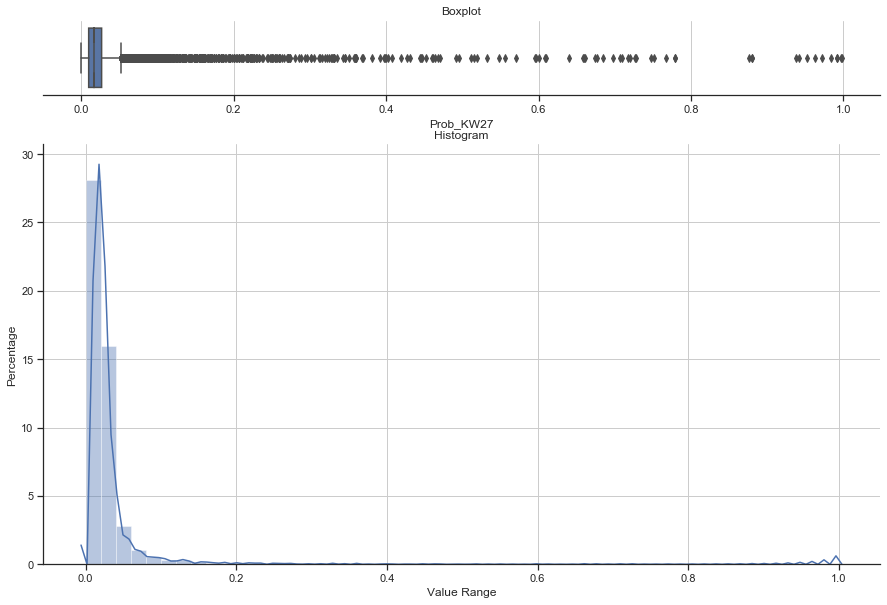

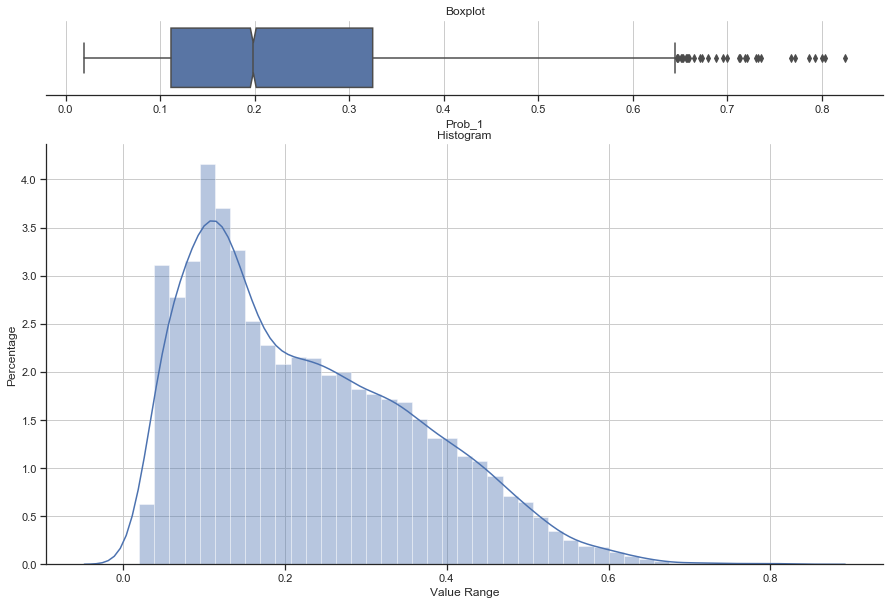

In [349]:
boxplot_histogram(comparision_df.loc[:,"Prob_KW27"])
boxplot_histogram(comparision_df.loc[:,"Prob_1"])

# Performance based on Cutoff

In [313]:
cutoffs = pd.Series(np.arange(0,1,0.001))

In [316]:
def success_sum(cutoff,model):
    row_select = comparision_df.loc[:,model] >= cutoff
    return comparision_df.loc[row_select,"Netto"].sum()
    

In [319]:
rebuild_series = cutoffs.map(lambda x: success_sum(x,model="Prob_1"))
rscript_series = cutoffs.map(lambda x: success_sum(x,model="Prob_KW27"))

In [322]:
import matplotlib
import matplotlib.pyplot as plt

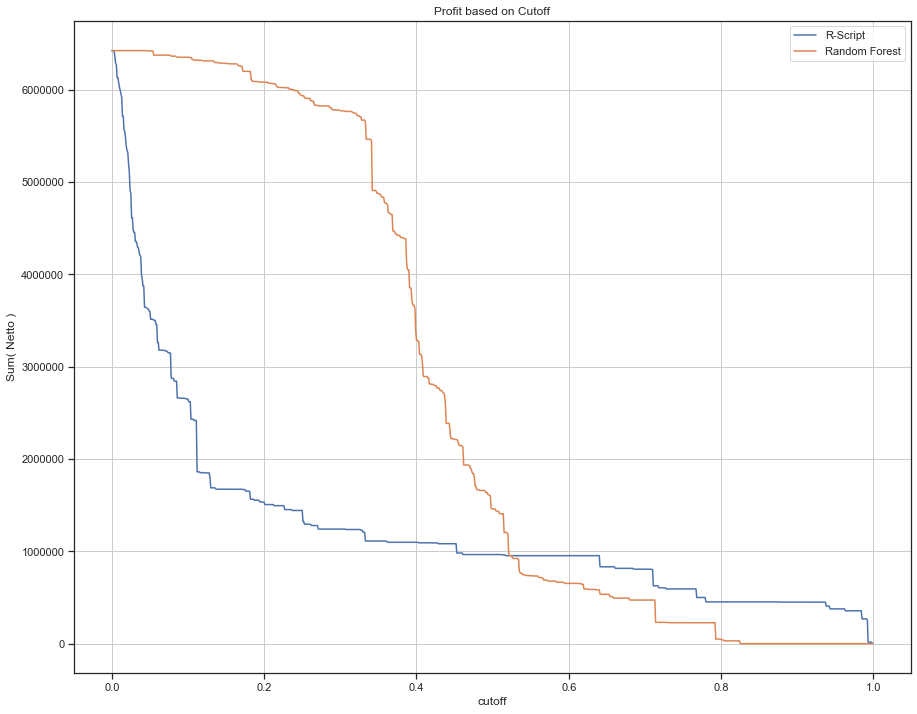

In [347]:
fig, ax = plt.subplots(figsize=(15,12))


ax.plot(cutoffs, rscript_series,label="R-Script")
ax.plot(cutoffs, rebuild_series,label="Random Forest")

ax.set(xlabel='cutoff', ylabel='Sum( Netto )',
       title='Profit based on Cutoff')
ax.grid()

#fig.savefig("test.png")
plt.legend(loc=0)
plt.show()

In [356]:
total = comparision_df.loc[:,"Netto"].sum()
print("AUC, rscript:", np.sum(0.001*rscript_series)/total)
print("AUC, rebuild:", np.sum(0.001*rebuild_series)/total)

AUC, rscript: 0.19570244482907834
AUC, rebuild: 0.4287541546684765


# Performance: Cummulative Netto Sum based on Number of selected customers

In [364]:
rscript_cumsum_series = comparision_df.sort_values("Prob_KW27",ascending=False).loc[:,"Netto"].cumsum()
rebuild_cumsum_series = comparision_df.sort_values("Prob_1",ascending=False).loc[:,"Netto"].cumsum()

In [370]:
#rscript_cumsum_series
#rebuild_cumsum_series
number_contacts = pd.Series(np.arange(1,len(rscript_cumsum_series)+1,1))

In [368]:
comparision_df.shape

(11680, 6)

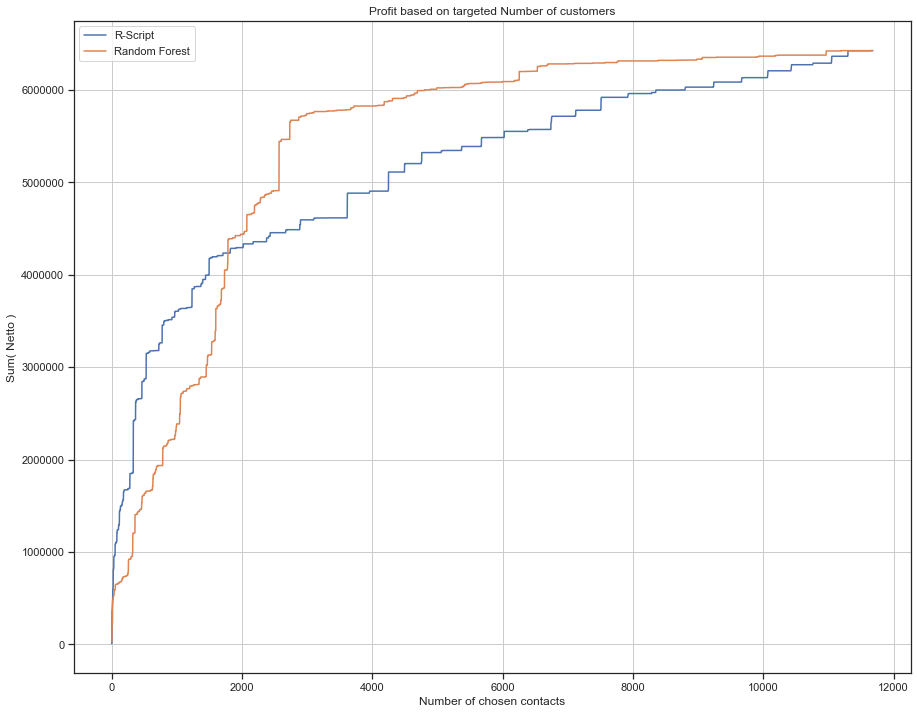

In [372]:
fig, ax = plt.subplots(figsize=(15,12))


ax.plot(number_contacts, rscript_cumsum_series,label="R-Script")
ax.plot(number_contacts, rebuild_cumsum_series,label="Random Forest")

ax.set(xlabel='Number of chosen contacts', ylabel='Sum( Netto )',
       title='Profit based on targeted Number of customers')
ax.grid()

#fig.savefig("test.png")
plt.legend(loc=0)
plt.show()

In [422]:
number_rscript = (
    comparision_df
    .sort_values("Prob_KW27",ascending=False)
    .loc[:,"Netto"]
    .map(lambda x: int(bool(x)))
    .cumsum()
    .reset_index(inplace=False)
    .loc[:,"Netto"]
    )

number_rebuild = (
    comparision_df
    .sort_values("Prob_1",ascending=False)
    .loc[:,"Netto"]
    .map(lambda x: int(bool(x)))
    .cumsum()
    .reset_index(inplace=False)
    .loc[:,"Netto"]
    )

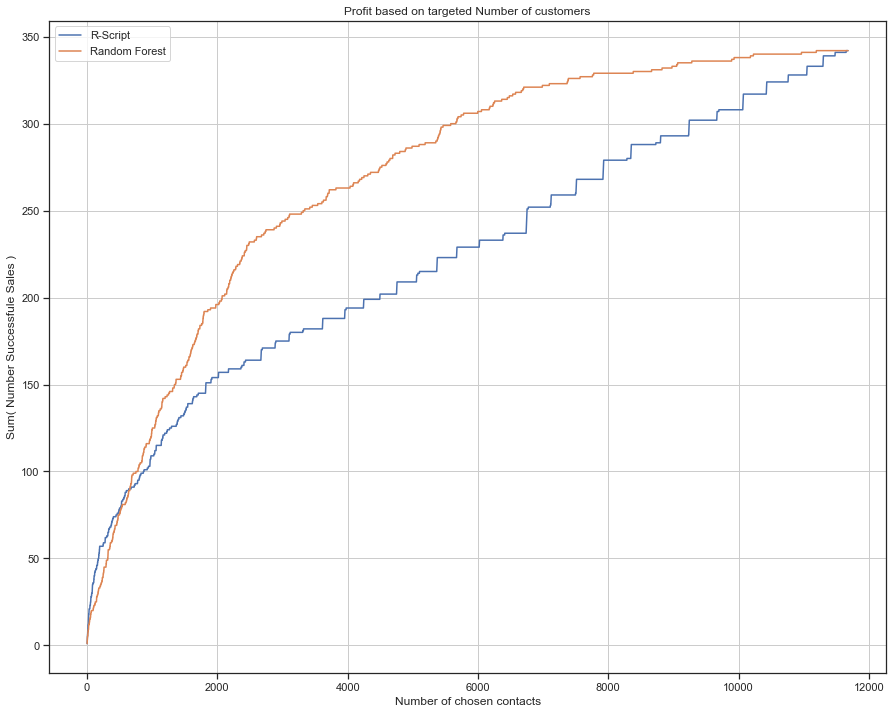

In [423]:
fig, ax = plt.subplots(figsize=(15,12))


ax.plot(number_contacts, number_rscript,label="R-Script")
ax.plot(number_contacts, number_rebuild,label="Random Forest")

ax.set(xlabel='Number of chosen contacts', ylabel='Sum( Number Successfule Sales )',
       title='Profit based on targeted Number of customers')
ax.grid()

#fig.savefig("test.png")
plt.legend(loc=0)
plt.show()

In [428]:
print(134.9/3)
print(170/3)

44.96666666666667
56.666666666666664


In [464]:
len(number_contacts)

11680

In [476]:
print("AUC (percentage):")
print(f"Rebuild:  {number_rebuild.sum() / (number_rscript.max()*number_contacts.max() - number_rscript.max()**2/2 )}"[:15])
print(f"R-Script: {number_rscript.sum() / (number_rscript.max()*number_contacts.max() - number_rscript.max()**2/2 )}"[:15])



AUC (percentage):
Rebuild:  0.803
R-Script: 0.665


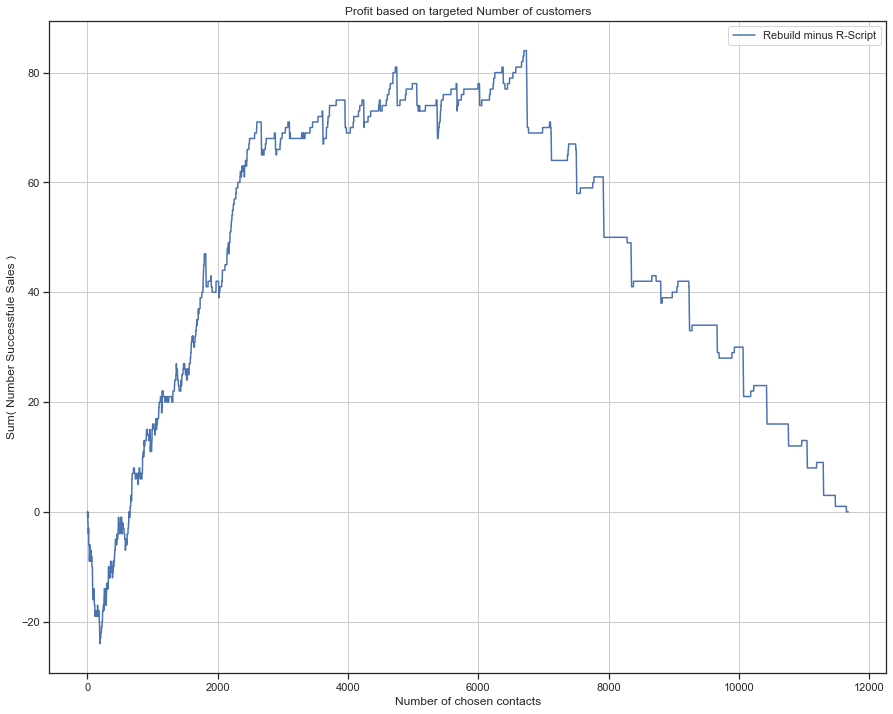

In [429]:
fig, ax = plt.subplots(figsize=(15,12))


ax.plot(number_contacts, number_rebuild-number_rscript,label="Rebuild minus R-Script")


ax.set(xlabel='Number of chosen contacts', ylabel='Sum( Number Successfule Sales )',
       title='Profit based on targeted Number of customers')
ax.grid()

#fig.savefig("test.png")
plt.legend(loc=0)
plt.show()

- It's rather unlikely to contact 6000 customers.
- It has to be taken into respect of how many active VKbers are employed, and deduce from this a feasible number of customers

## Number of Vkbers

In [445]:
vkprog_raw.head(3)

,MA_ID,KOMBI_NAME,E_MAIL,KURZZEICHEN,FUNKTION,KAM
0,125,Schnyder Bernhard,bernhard.schnyder@apgsga.ch,ABS,Key Account Management,True
1,15505,Coralic Alma,alma.coralic@apgsga.ch,ACO,Verkaufsberatung Ost Aussendienst,False
2,155,Steltzlen Andreas,andreas.steltzlen@apgsga.ch,AST,Leitung Verkaufsberatung Bern Mitte,False


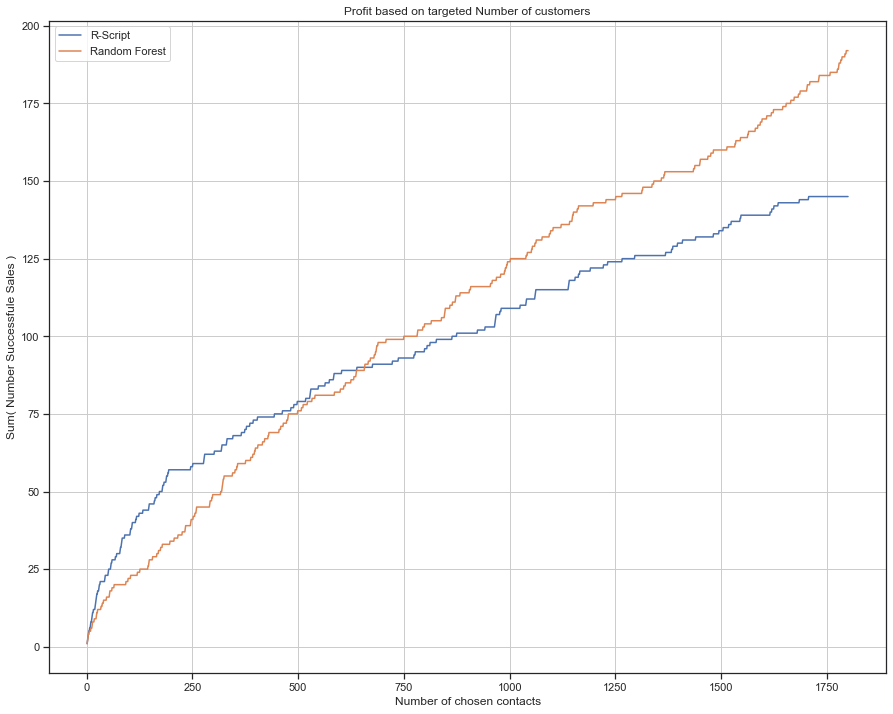

In [450]:
num_vkbers = len(set(vkprog_raw.loc[:,"KURZZEICHEN"]))
per_vkber  = 20
total_max_num = num_vkbers*per_vkber



fig, ax = plt.subplots(figsize=(15,12))


ax.plot(number_contacts[:total_max_num], number_rscript[:total_max_num],label="R-Script")
ax.plot(number_contacts[:total_max_num], number_rebuild[:total_max_num],label="Random Forest")

ax.set(xlabel='Number of chosen contacts', ylabel='Sum( Number Successfule Sales )',
       title='Profit based on targeted Number of customers')
ax.grid()

#fig.savefig("test.png")
plt.legend(loc=0)
plt.show()

# Sandbox

In [609]:
def load_ek_list_rscript(file):
    raw_text            = open("C:\\Users\stc\data\\vkprog\\predictions\\"+file,"r")
    text_row_list       = raw_text.readlines()
    
    text_single_entries = [x.replace("\n","").split(';') for x in text_row_list]
    
    subselect_list      = [x[0:18] + x[-57:] for x in text_single_entries]
    
    pred_rscript_raw    = pd.DataFrame(data    = subselect_list[1:],
                                       columns = subselect_list[0]
                                      )
    
    col_select = ["ENDKUNDE_NR","Endkunde"] + [col for col in pred_rscript_raw.columns if col.startswith("prob_KW")]
    
    row_select = (pred_rscript_raw
                  .loc[:,"ENDKUNDE_NR"]
                  .map(lambda x: str(x).isdigit())
                 )
    
    ek_list_rscript = (pred_rscript_raw
            .loc[row_select,:]
            .astype({"ENDKUNDE_NR": "int64"})
            .rename(columns={"ENDKUNDE_NR": "Endkunde_NR"})
           )
    
    return ek_list_rscript

In [610]:
pred_rscript_raw = load_ek_list_rscript("20190701_EK_LIST_2W_KOMPLETT.csv")

In [611]:
pred_rscript_raw.sample()

,Endkunde_NR,Endkunde,Agentur,HB_Agentur,PLZ,Ort,Net_2015,Net_2016,Net_2017,Net_2018,Net_2019,Verkaufsgebiet,VB_VK_Geb,VB_APG,HB_APG,letzte_VBs,letzter_Kontakt,KZ_letzter_Ktkt,letzte_Kamp_Beginn,Grosskunde,Kleinkunde,Neukunde,Insolvenz,Umsatz_erreicht,kuerzlich_gebucht,kuerzlich_im_aushang,kuerzlich_im_kontakt,VB_FILTER_VON,VB_FILTER_BIS,VB_FILTER_AKTIV,VB_FILTER_GRUND,prob_KW27,prob_max_jahr,KW,Net_Airport_2015,Net_APG|SGA_2015,Net_APG|SGA_2016,Net_APG|SGA_2017,Net_APG|SGA_2018,Net_APG|SGA_2019,Net_Digital Sales_2015,Net_Digital Sales_2016,Net_Digital Sales_2017,Net_Digital Sales_2018,Net_Digital Sales_2019,Net_Megaposter_2015,Net_Megaposter_2016,Net_Megaposter_2017,Net_Megaposter_2018,Net_Megaposter_2019,Net_Mountain_2015,Net_Mountain_2016,Net_Mountain_2017,Net_Mountain_2018,Net_Mountain_2019,Net_Promotion_2016,Net_Promotion_2017,Net_Promotion_2018,Net_Promotion_2019,Net_Rail_2015,Net_Rail_2016,Net_Rail_2017,Net_Rail_2018,Net_Rail_2019,Net_Traffic_2015,Net_Traffic_2016,Net_Traffic_2017,Net_Traffic_2018,Net_Traffic_2019,VB_Digital Sales,VB_Megaposter,VB_Mountain,VB_Promotion,VB_Rail,VB_Traffic
11414,557174,Association Poésie en arrosoir,,,2300,La Chaux-de-Fonds,5446,5632,3670,4997,4743,V-W04,VIT,"VIT,MFB",VIT,"VIT,MFB",2019-03-28,WSA,2019-07-01,,,,,1,,1,1,,,,,0.2,58.1,"KW05=0.011, KW11=0.013, KW13=0.014, KW15=0.021...",,5446,5632,3670,4997,4743,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [608]:
pred_rscript_raw.loc[:,["prob_KW27"]]

,prob_KW27
0,99.8
1,99.7
2,99.2
3,99.1
4,98.4
5,97.2
6,96.2
7,95.2
8,94.2
9,93.8


In [607]:
desc_col(pred_rscript_raw)

,DTYPE,NULLS,UNIQUE
Endkunde_NR,int64,0/11684,11684
Endkunde,object,0/11684,11200
prob_KW27,object,0/11684,315
